In [54]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [12]:
df=pd.read_excel(r"dry_bean_dataset.xlsx")

In [13]:
df.head(5)

,area,perimeter,major_axis_length,minor_axis_length,aspect_ratio,eccentricity,convex_area,equiv_diameter,extent,solidity,roundness,compactness,shape_factor1,shape_factor2,shape_factor3,shape_factor4,class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [14]:
print("Distribution of classes in the target variable:")
print(df['class'].value_counts())

Distribution of classes in the target variable:
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: class, dtype: int64


In [15]:
df.isna().sum()

area                 0
perimeter            0
major_axis_length    0
minor_axis_length    0
aspect_ratio         0
eccentricity         0
convex_area          0
equiv_diameter       0
extent               0
solidity             0
roundness            0
compactness          0
shape_factor1        0
shape_factor2        0
shape_factor3        0
shape_factor4        0
class                0
dtype: int64

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

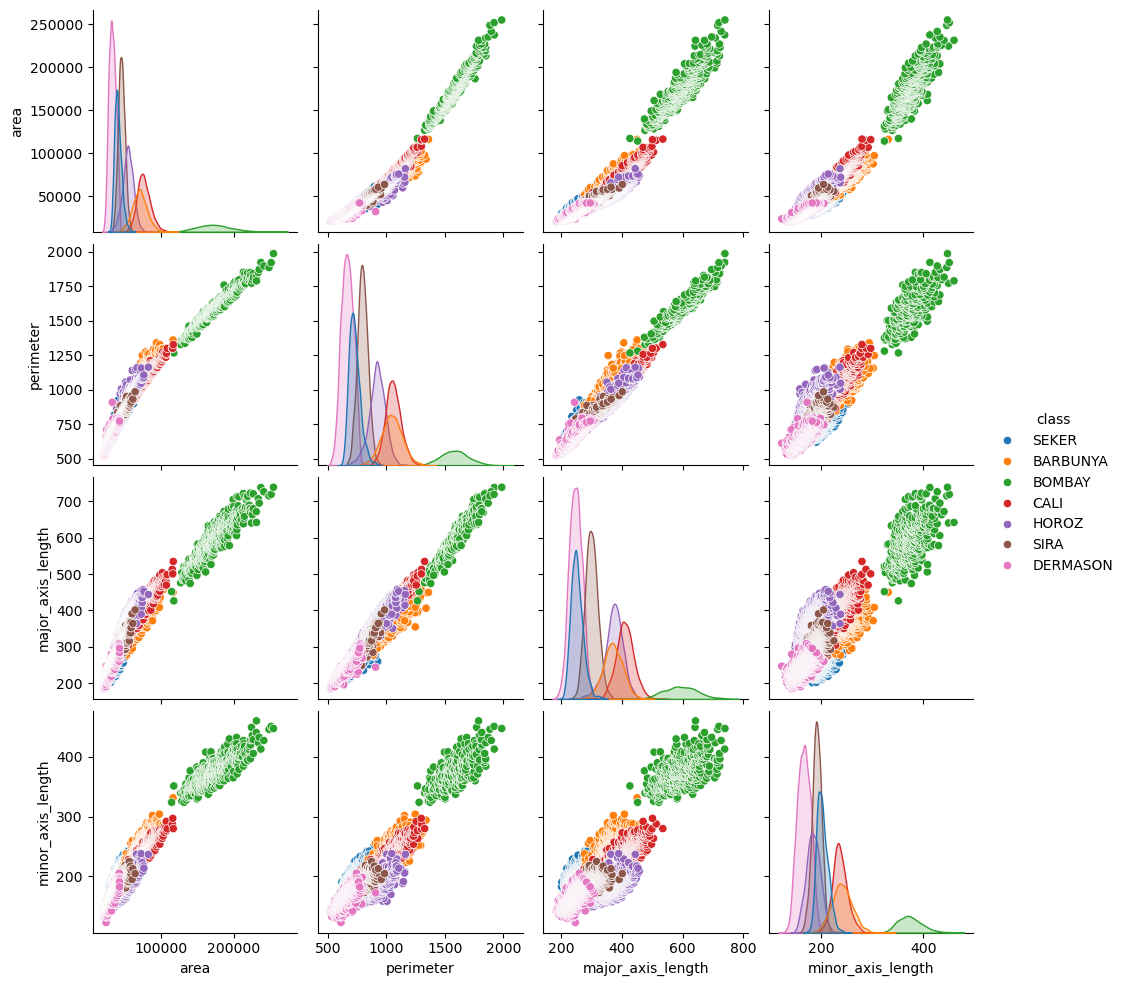

In [17]:
sns.pairplot(df, vars=["area", "perimeter", "major_axis_length", "minor_axis_length"], hue="class")
plt.show()

In [57]:
X=df.drop("class",axis=1)

In [58]:
y=df["class"]

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
from sklearn.linear_model import LogisticRegression

In [65]:
model=LogisticRegression(solver='lbfgs', max_iter=800)

In [66]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=800)

In [67]:
model.score(X_test,y_test)

0.816746235769372

In [68]:
from sklearn.metrics import classification_report

In [69]:
y_pred=model.predict(X_test)

In [70]:
report=classification_report(y_test,y_pred)

In [71]:
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.75      0.73      0.74       261
      BOMBAY       0.95      1.00      0.97       117
        CALI       0.82      0.81      0.82       317
    DERMASON       0.84      0.86      0.85       671
       HOROZ       0.93      0.87      0.90       408
       SEKER       0.73      0.75      0.74       413
        SIRA       0.77      0.78      0.77       536

    accuracy                           0.82      2723
   macro avg       0.83      0.83      0.83      2723
weighted avg       0.82      0.82      0.82      2723



In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
cm=confusion_matrix(y_test,y_pred)

In [74]:
cm

array([[190,   0,  47,   0,   1,   0,  23],
       [  0, 117,   0,   0,   0,   0,   0],
       [ 47,   5, 257,   0,   7,   0,   1],
       [  0,   0,   0, 577,   0,  64,  30],
       [  9,   1,   9,  24, 353,   0,  12],
       [  6,   0,   0,  34,   0, 311,  62],
       [  0,   0,   0,  49,  19,  49, 419]], dtype=int64)

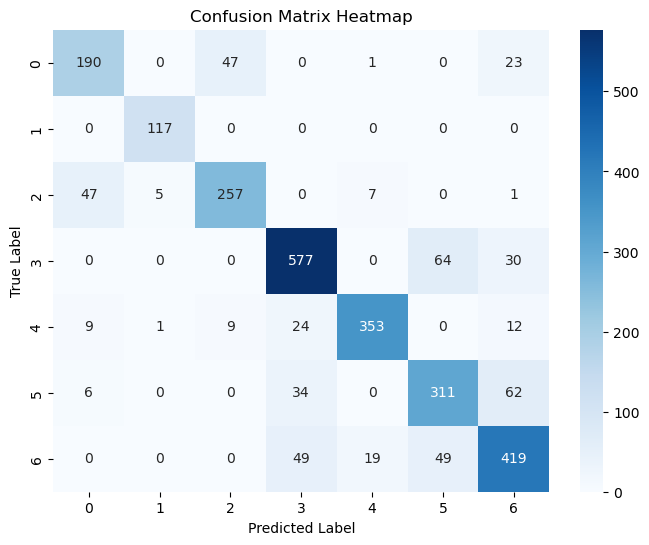

In [75]:
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')  # 'fmt' to control number format, 'annot' to add numbers
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [84]:
model_new=LogisticRegression(max_iter=900,C=0.5,class_weight='balanced',tol=0.001)

In [85]:
model_new.fit(X_train,y_train)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=900, tol=0.001)

In [86]:
y_pred_new=model_new.predict(X_test)

In [87]:
new_report=classification_report(y_test,y_pred_new)

In [88]:
print(new_report)

              precision    recall  f1-score   support

    BARBUNYA       0.82      0.85      0.83       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.89      0.86      0.88       317
    DERMASON       0.87      0.84      0.86       671
       HOROZ       0.90      0.89      0.89       408
       SEKER       0.78      0.84      0.80       413
        SIRA       0.81      0.80      0.80       536

    accuracy                           0.85      2723
   macro avg       0.87      0.87      0.87      2723
weighted avg       0.85      0.85      0.85      2723



In [89]:
model_new.score(X_test,y_test)

0.8497980168931326

In [90]:
cm_new=confusion_matrix(y_test,y_pred_new)

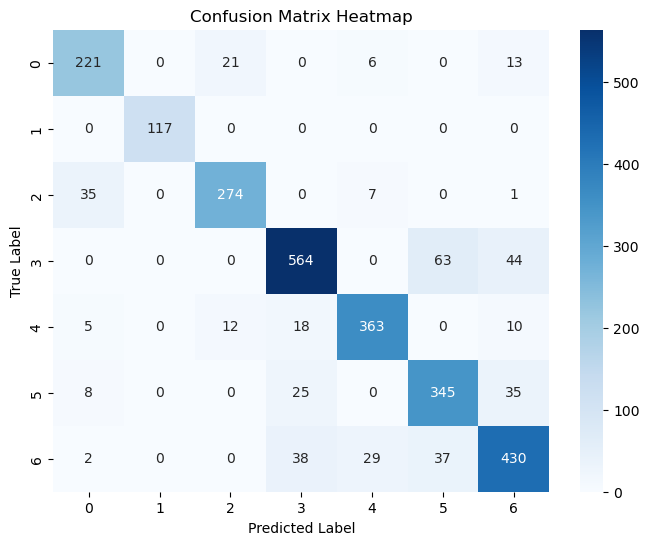

In [91]:
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(cm_new, annot=True, fmt='g', cmap='Blues')  # 'fmt' to control number format, 'annot' to add numbers
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()